In [57]:
import os
import sys
import talib as ta
syspath = os.path.split(os.path.abspath("."))[0]
sys.path.append(syspath)
import univ3api.simulation as sim
import univ3api.utils as utils
import importlib
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# run if simulation file is updated
importlib.reload(sim)

HOST = "mongodb://172.16.11.81:27017/ETHDATA"
source = sim.DataUtilMongoDB(HOST)

from datetime import datetime
import time
d1 = datetime(2021,5, 10, 9)
d2 = datetime(2021,9, 1,9)
t1 = int(time.mktime(d1.timetuple()))
t2 = int(time.mktime(d2.timetuple()))

# print(d1.timetuple())
# print(time.mktime(d1.timetuple()))
# print(int(time.mktime(d1.timetuple())))

# swapdata = source.swap_by_time("SWAP_WETH_USDT_3000", t1, t2)
swapdata = source.swap_by_time("SWAP_USDC_WETH_3000", t1, t2)
swapdata.tail()
pricedata = swapdata[["timestamp", "sqrtPriceX96"]]
# pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(18, 6).x96_to_price)
pricedata["price"] = pricedata["sqrtPriceX96"].apply(utils.PriceConverter(6, 18).x96_to_price)
pricedata.tail()

,timestamp,sqrtPriceX96,price
120400,1630457280,1355527382349696291973070296916222,0.000293
120401,1630457316,1355633495651790988012240522812889,0.000293
120402,1630457355,1356496723249880871370773228843790,0.000293
120403,1630457391,1356664209375015011561300805592324,0.000293
120404,1630457391,1357380036677709158041273101685800,0.000294


In [58]:
priceDf = pricedata
priceDf['datetime'] = list(map(lambda d: datetime.fromtimestamp(d), priceDf['timestamp'] ))
priceDt = priceDf.set_index('datetime')
priceDay = priceDt.resample('D').last()
priceDay['MA50'] = priceDay['price'].rolling(50).mean()
priceDay['Trend'] = priceDay['price']>=priceDay['MA50']
priceDay.index = list(map(lambda d: d.date(), priceDay.index))
trendDict = dict(priceDay['Trend'])
priceDt['date'] = list(map(lambda d: d.date(), priceDt.index))
trendList = []
for i, v in priceDt.iterrows():
    trendList.append(trendDict[v['date']])
print(f'len of trendList:{len(trendList)}')
priceDt['trend'] = trendList

len of trendList:120405


In [59]:
priceDt

,timestamp,sqrtPriceX96,price,date,trend
datetime,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000256,2021-05-10,False
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000256,2021-05-10,False
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000256,2021-05-10,False
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000256,2021-05-10,False
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000256,2021-05-10,False
...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000293,2021-09-01,False
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000293,2021-09-01,False
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000293,2021-09-01,False


In [60]:
pricedata_res = pd.read_csv('../data/pricedata_res.csv',index_col=0)
pricedata_res

,timestamp,sqrtPriceX96,price,SmaLowerLma,VolLowerQuantile75,CloseLowerMA,VolHigherQuantile50TwoSigma
datetime,,,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000216,0.0,1.0,0.0,0.0
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000049,0.0,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000050,0.0,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000051,0.0,1.0,0.0,0.0
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000154,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000057,1.0,1.0,0.0,0.0
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000193,1.0,1.0,0.0,0.0
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000092,1.0,1.0,0.0,0.0


In [61]:
pricedata_res['price'] = priceDt['price']
pricedata_res

,timestamp,sqrtPriceX96,price,SmaLowerLma,VolLowerQuantile75,CloseLowerMA,VolHigherQuantile50TwoSigma
datetime,,,,,,,
2021-05-10 09:17:52,1620609472,1267554519342589161168659854845874,0.000256,0.0,1.0,0.0,0.0
2021-05-10 09:23:50,1620609830,1267498129839936824485169221023868,0.000256,0.0,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496927736336268048970777338285,0.000256,0.0,1.0,0.0,0.0
2021-05-10 09:24:49,1620609889,1267496466129159558106023913391909,0.000256,0.0,1.0,0.0,0.0
2021-05-10 09:24:54,1620609894,1267269382521328460205280017540103,0.000256,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
2021-09-01 08:48:00,1630457280,1355527382349696291973070296916222,0.000293,1.0,1.0,0.0,0.0
2021-09-01 08:48:36,1630457316,1355633495651790988012240522812889,0.000293,1.0,1.0,0.0,0.0
2021-09-01 08:49:15,1630457355,1356496723249880871370773228843790,0.000293,1.0,1.0,0.0,0.0


In [62]:
init_price = pricedata_res["price"][0]

decimal0 = 6
decimal1 = 18

init_amount0 = 1000000*1e6
init_amount1 = 0

In [79]:
import usdceth_vol_strategy
importlib.reload(utils)
importlib.reload(sim)
importlib.reload(usdceth_vol_strategy)
strategy = usdceth_vol_strategy.HoldStrategy(init_amount0, init_amount1, decimal0, decimal1, sim.PoolFee.low, True)
strategy.init(swapdata.iloc[0].to_dict())

# strategy.run(swapdata, priceDt)
strategy.run(swapdata, pricedata_res)

report = strategy.report()

**********************【Price Over MA】【创建Long Vol池子】【第1次建池】***********************************
转换后钱包中余额 amount0:  399700000000.0 amount1:  153401599031946575872
price:  0.0002559611947100053
$$$$$$$【Upper Price】: 0.00033006024065851007
$$$$$$$【Lower Price】: 0.00018186214876150054
######【L】:53918237685642440【USDC】:399700000000【ETH】:137576274175177474048
将要投入池子的数量 amount_t0: 399700000000 amount_t1: 137576274175177375744
【RealWorldTime】:2021-05-10 09:17:52, Timestamp: 1620609472, Blocknumber: 12403600
Mint position： Position(L=53917490842266688, tick=[190140, 196140], range=[3035.1064, 5530.1585])
【Mint amount】: token0=399687.018601, token1=137.5762741751774
Wallet amount: token0=12.981399, token1=15.8253248567692
******************************************【撤销池子】【原因:OverMA与VolHigherQuantile50TwoSigma条件不满足】****************************
Price(0.00024930325912902914) out of range(0.00018186214876150054, 0.00033006024065851007)
【RealWorldTime】:2021-05-13 14:54:25,Timestamp: 1620888865, Blocknumb

******************************************【撤销池子】【原因:超边撤池】******************************************
Price(0.0005138484814101204) out of range(0.00032077466190581435, 0.0005064977501386244)
【RealWorldTime】:2021-06-21 17:20:02,Timestamp: 1624267202, Blocknumber: 12676797
Decreased position： Position(L=0, tick=[195840, 200400], range=[1982.3198, 3127.5344])
【Decreased amount】: token0=23577.68625, token1=353.0204038846339
Wallet amount: token0=23936.154001, token1=402.2640269839799
撤池后经转换 Wallet amount: token0=792981.53166, token1=19.950643350493255
**********************【Price Below MA】【创建Short Vol池子】【第10次建池】***********************************
转换后钱包中余额 amount0:  316954718205.0 amount1:  256646280934395861750
price:  0.0005117259554453437
$$$$$$$【Upper Price】: 0.000626608699497359
$$$$$$$【Lower Price】: 0.00039684321139332843
######【L】:74743841913010992【USDC】:316954718205【ETH】:201870032915458883584
将要投入池子的数量 amount_t0: 316954718205 amount_t1: 201870032915458883584
【RealWorldTime】:2021-06-21

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-05-10 09:17:52,399687.018601,0.000000,0.000000,0.000000,137.576,0.000000,0.000000,0.000000
1,2021-05-10 09:17:52,399687.018601,0.000000,0.000000,0.000000,137.576,0.000000,0.000000,0.000000
2,2021-05-10 09:23:50,399836.950329,0.074965,0.074965,0.074965,137.538,0.000000,0.000000,0.000000
3,2021-05-10 09:24:49,399840.146698,0.001598,0.076563,0.076563,137.537,0.000000,0.000000,0.000000
4,2021-05-10 09:24:49,399841.374104,0.000613,0.077176,0.077176,137.537,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
2571,2021-05-13 14:51:13,440357.055621,2.901993,1674.691646,1674.691646,127.29,0.000000,0.413935,0.413935
2572,2021-05-13 14:52:15,440278.065597,0.000000,1674.691646,1674.691646,127.31,0.000010,0.413944,0.413944
2573,2021-05-13 14:52:51,440254.807647,0.000000,1674.691646,1674.691646,127.316,0.000003,0.413947,0.413947
2574,2021-05-13 14:54:25,444194.388164,1.969790,1676.661436,1676.661436,126.333,0.000000,0.413947,0.413947


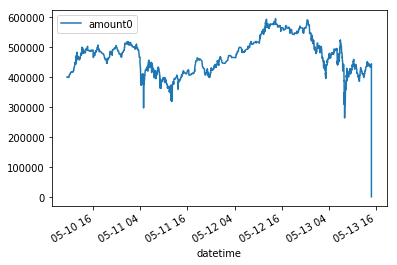

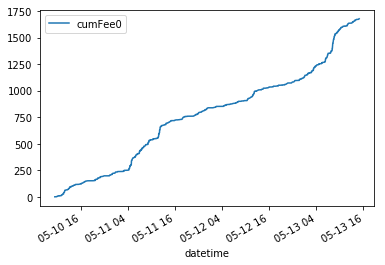

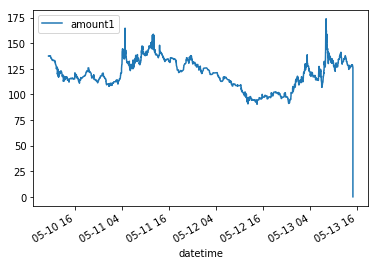

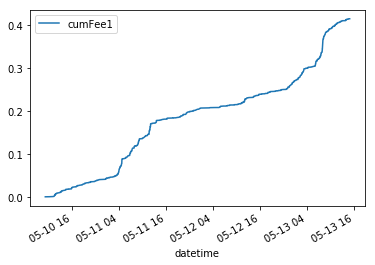

In [80]:
report.positions[1].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-06-03 15:59:39,395005.309087,0.000000,0.000000,0.000000,185.565,0.000000e+00,0.000000,0.000000
1,2021-06-03 16:01:35,394300.779096,0.000000,0.000000,0.000000,185.814,1.247426e-04,0.000125,0.000125
2,2021-06-03 16:14:09,394805.791132,0.252506,0.252506,0.252506,185.635,0.000000e+00,0.000125,0.000125
3,2021-06-03 16:14:09,395332.622896,0.263415,0.515921,0.515921,185.449,0.000000e+00,0.000125,0.000125
4,2021-06-03 16:14:38,395677.572360,0.172474,0.688395,0.688395,185.327,0.000000e+00,0.000125,0.000125
5,2021-06-03 16:14:42,396219.367759,0.270897,0.959292,0.959292,185.135,0.000000e+00,0.000125,0.000125
6,2021-06-03 16:14:42,396938.793146,0.359712,1.319004,1.319004,184.881,0.000000e+00,0.000125,0.000125
7,2021-06-03 16:15:22,398174.855161,0.618031,1.937035,1.937035,184.444,0.000000e+00,0.000125,0.000125
8,2021-06-03 16:19:08,396378.176584,0.000000,1.937035,1.937035,185.079,3.176163e-04,0.000442,0.000442
9,2021-06-03 16:24:26,396766.923204,0.194373,2.131408,2.131408,184.941,0.000000e+00,0.000442,0.000442


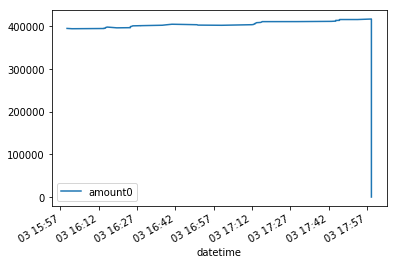

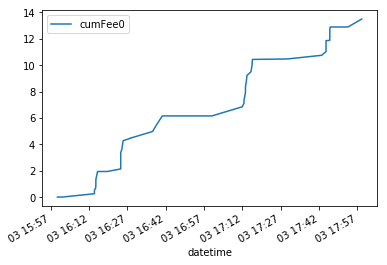

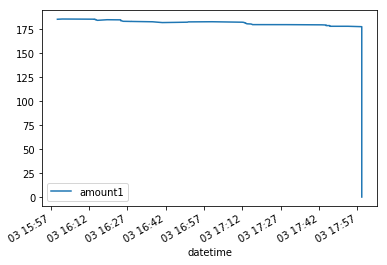

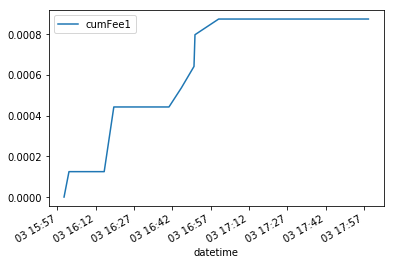

In [81]:
report.positions[2].get_balance(plain=True, draw_plot=True)

,datetime,amount0,fee0,cumFee0,collectedFee0,amount1,fee1,cumFee1,collectedFee1
0,2021-06-04 05:37:51,392410.431715,0.000000,0.000000,0.000000,185.449,0.0,0.0,0.0
1,2021-06-04 06:09:32,393156.535127,0.373051,0.373051,0.373051,185.185,0.0,0.0,0.0
2,2021-06-04 06:10:41,393737.348367,0.290406,0.663457,0.663457,184.979,0.0,0.0,0.0
3,2021-06-04 06:11:13,393845.327756,0.053989,0.717446,0.717446,184.941,0.0,0.0,0.0
4,2021-06-04 06:11:31,394249.116136,0.201894,0.919340,0.919340,184.798,0.0,0.0,0.0
5,2021-06-04 06:11:31,396000.970009,0.875926,1.795266,1.795266,184.179,0.0,0.0,0.0
6,2021-06-04 06:12:14,396108.949398,0.053989,1.849255,1.849255,184.14,0.0,0.0,0.0
7,2021-06-04 06:14:54,397592.296928,0.741673,2.590928,2.590928,183.616,0.0,0.0,0.0
8,2021-06-04 06:15:37,397775.028036,0.091365,2.682293,2.682293,183.552,0.0,0.0,0.0
9,2021-06-04 06:34:30,398787.230182,0.506101,3.188394,3.188394,183.194,0.0,0.0,0.0


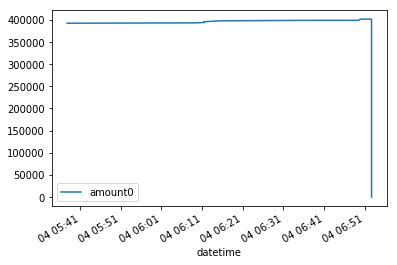

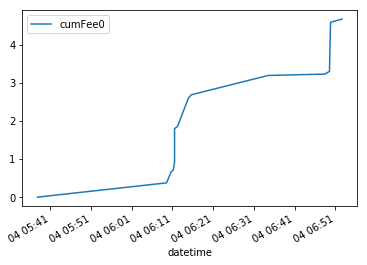

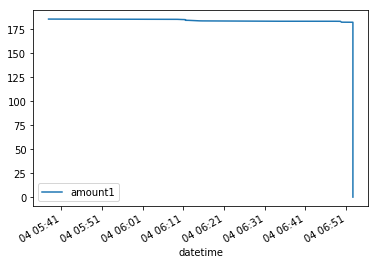

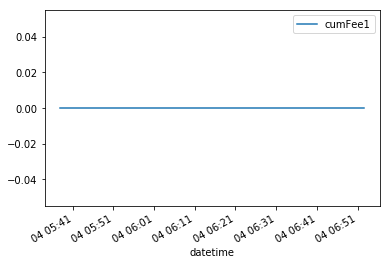

In [82]:
report.positions[3].get_balance(plain=True, draw_plot=True)

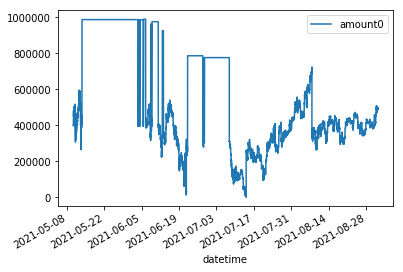

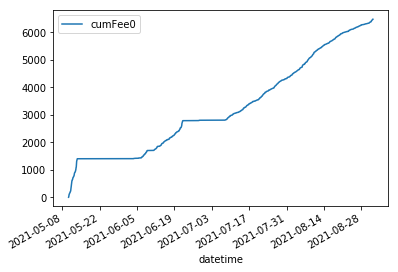

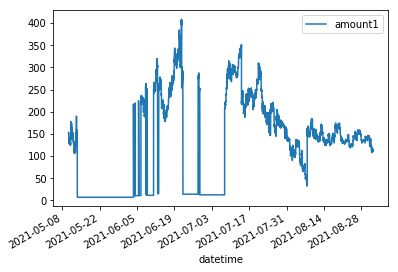

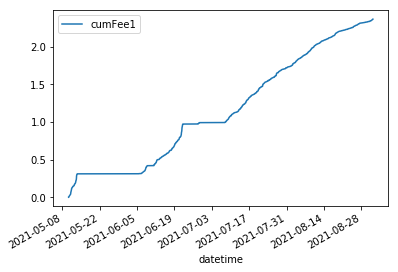

In [83]:
total_balance = report.total_balance(draw_plot=True, plain=True)

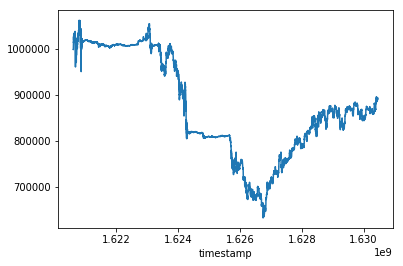

In [84]:
price = pricedata.drop_duplicates("timestamp").set_index("timestamp")["price"]
price
usdc_balance = total_balance.set_index("timestamp")[["amount0", "cumFee0"]].sum(axis=1)
eth_balance = total_balance.set_index("timestamp")[["amount1", "cumFee1"]].sum(axis=1) / price
eth_balance+usdc_balance
# eth_balance.plot()
# usdt_balance.plot()
tb_Timing = (eth_balance+usdc_balance)
tb_Timing.plot()

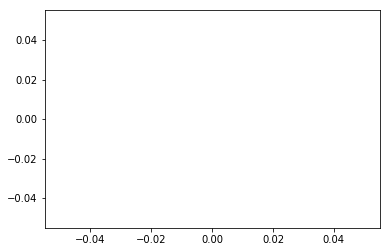

In [85]:
assets_value = (total_balance["amount1"] / 10**decimal1)/pricedata.set_index("timestamp")["price"] + total_balance["amount0"] / 10**decimal0
assets_value.plot()
# pricedata.set_index("timestamp")[["price"]].plot()

In [86]:
assets_value

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
             ... 
1630457280    NaN
1630457316    NaN
1630457355    NaN
1630457391    NaN
1630457391    NaN
Length: 210642, dtype: object